In [4]:
# サンプリングレートとチャンネル数
samplerate = 44100
channels = 1

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    # インプットデータをそのままアウトプットデータにコピー
    outdata[:] = indata

async def play_audio():
    # 非同期で実行するためにストリームを別スレッドで開始
    with sd.Stream(samplerate=samplerate, channels=channels, callback=callback):
        print("Playing environment audio")
        await asyncio.sleep(5)  # 非同期スリープで5秒間再生

# 非同期イベントループを開始して関数を実行
await play_audio()

Playing environment audio


In [1]:
from pydub import AudioSegment

In [6]:
audio_test = AudioSegment.from_file("audio_1.mp3")

In [7]:
print(f"Sampling rate: {audio_test.frame_rate} Hz")
print(f"Channels: {audio_test.channels}")

Sampling rate: 44100 Hz
Channels: 2


In [8]:
one_second = audio_test[:1000]

In [9]:
samples = one_second.get_array_of_samples()

In [10]:
len(samples), samples[:10]

(88200, array('h', [-1, 0, -1, -1, -1, -1, 0, -1, 0, 0]))

In [11]:
np_samples = np.array(samples)

ここから241118

In [5]:
#demo用の備え付け音源を.
audio_files = ["audio_1.mp3", "audio_2.mp3", "audio_3.mp3"]
audio_list = list(map(AudioSegment.from_file, audio_files))


In [ ]:
# combined_audio = None

# for i, file in enumerate(audio_files):
#     audio = audio_list[i]

#     audio = audio + volume_data[f"mic{i+1}"]
#         if combined_audio is None:
#             combined_audio = audio
#         else:
#             combined_audio = combined_audio.overlay(audio)

#     audio_array = np.array(combined_audio.get_array_of_samples())
#     sd.play(audio_array, samplerate=combined_audio.frame_rate)

#     return {"status": "success", "message": "Test audio started playing"}

NameError: name 'Request' is not defined

In [ ]:
#demo用の備え付け音源を.
audio_files = ["audio_1.mp3", "audio_2.mp3", "audio_3.mp3"]
audio_list = list(map(AudioSegment.from_file, audio_files))

audio_test = audio_list[0]
audio_test = audio_test + 10
audio_array = np.array(audio_test.get_array_of_samples())
# sd.play(audio_array, samplerate=audio_test.frame_rate)

In [12]:
audio_test = audio_test + 100

In [15]:
import streamlit as st

In [ ]:
# 音量調整の関数
def adjust_volume(audio, gain_db:int):
    return audio + gain_db

# サンプルレート
samplerate = audio_test.frame_rate

# Streamlit UIの設定
st.title("リアルタイム音量調整")

# スライダーを使って音量を調整
volume = st.slider("音量 (dB)", -30, 30, 0)

# 音源の音量調整
adjusted_audio = adjust_volume(audio_test, volume)

# 音声を再生
audio_array = np.array(adjusted_audio.get_array_of_samples())

# 再生ボタン
if st.button("再生"):
    sd.play(audio_array, samplerate=samplerate)

2024-11-18 17:47:04.396 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 17:47:04.478 
  command:

    streamlit run /opt/anaconda3/envs/what_is_red/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-11-18 17:47:04.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 17:47:04.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 17:47:04.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 17:47:04.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 17:47:04.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 17:47:04.481 Threa

In [23]:
samplerate = audio_test.frame_rate
print(f"Sampling rate: {samplerate} Hz")

# 音量調整の関数
def adjust_volume(audio, gain_db: int):
    return audio + gain_db

# 音声を再生する関数
def play_audio(audio, volume):
    # 初期の音量調整
    adjusted_audio = adjust_volume(audio, volume)
    audio_array = np.array(adjusted_audio.get_array_of_samples())
    
    # 再生中に音量を変更するためのループ
    stream = sd.OutputStream(samplerate=samplerate, channels=1, dtype='int16')
    stream.start()
    
    # 音声の再生
    stream.write(audio_array)
    
    # 音量変更を監視し、リアルタイムで音量変更
    while True:
        new_volume = volume_slider_value  # 現在の音量（グローバル変数）
        if new_volume != volume:
            adjusted_audio = adjust_volume(audio, new_volume)
            audio_array = np.array(adjusted_audio.get_array_of_samples())
            stream.write(audio_array)
            volume = new_volume
        time.sleep(0.1)  # 音量変更をチェックする頻度

Sampling rate: 44100 Hz


In [19]:
# 音量スライダーを使って音量を調整
volume_slider_value = 0

In [ ]:
threading.Thread(target=play_audio, args=(audio_test, volume_slider_value)).start()


In [ ]:
def monitor_data(data, current_data):
    while True:
        new_data = data
        if new_data != current_data:
            current_data = new_data
        print(data)
        time.sleep(1)

In [34]:
data = 5

In [2]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import asyncio
import streamlit as st
import threading
import time
from pydantic import BaseModel

In [ ]:
# threading.Thread(target=monitor_data, args=(data,)).start()

In [2]:
#demo用の備え付け音源を.
audio_files = ["audio_1.mp3", "audio_2.mp3", "audio_3.mp3"]
audio_list = list(map(AudioSegment.from_file, audio_files))

samplerate = audio_list[0].frame_rate

def play_audio(audio):
    audio_array = np.array(audio.get_array_of_samples())
    
    # 再生中に音量を変更するためのループ
    stream = sd.OutputStream(samplerate=samplerate, channels=1, dtype='int16')
    stream.start()
    
    # 音声の再生
    stream.write(audio_array)

samplerate = audio_list[0].frame_rate


In [3]:
samplerate = audio_list[0].frame_rate

# play_audio(audio_list[0])

In [3]:
for audio in audio_list:
    threading.Thread(target=play_audio, args=(audio,)).start()

In [ ]:
threading.Thread(target=play_audio, args=(audio_list[0],)).start()
threading.Thread(target=play_audio, args=(audio_list[1],)).start()



In [ ]:
import numpy as np
import time
import threading
from pydub import AudioSegment
from pydub.playback import play
from pydantic import BaseModel
import sounddevice as sd
import asyncio


# 音量データ周りの処理.
class VolumeData(BaseModel):
    mic0: int
    mic1: int
    mic2: int

current_volume:VolumeData = VolumeData(mic0=0,
                                       mic1=0,
                                       mic2=0
                                       )


#demo用の備え付け音源.
audio_files = ["audio_1.mp3",
            #    "audio_2.mp3",
            #    "audio_3.mp3"
               ]

audio_list = list(map(AudioSegment.from_file, audio_files))

# 音量調整の関数
def adjust_volume(audio, gain_db: int):
    return audio + gain_db

# 音声を再生する関数
def play_audio(audio, volume: int):
    # 初期の音量調整
    adjusted_audio = adjust_volume(audio, volume)
    audio_array = np.array(adjusted_audio.get_array_of_samples())
    
    # 再生中に音量を変更するためのループ
    stream = sd.OutputStream(samplerate=samplerate, channels=1, dtype='int16')
    stream.start()
    
    # 音声の再生
    stream.write(audio_array)
    
    # 音量変更を監視し、リアルタイムで音量変更
    while True:
        new_volume = current_volume  # 現在の音量（グローバル変数）
        if new_volume != volume:
            adjusted_audio = adjust_volume(audio, new_volume)
            audio_array = np.array(adjusted_audio.get_array_of_samples())
            stream.write(audio_array)
            volume = new_volume
        time.sleep(0.1)  # 音量変更をチェックする頻度

async def stream_audio(i):
    global current_volume
    audio = audio_list[i]
    samplerate = audio.frame_rate
    initial_volume = current_volume.mic0
    
    # チャンクサイズを100ms（0.1秒）に設定
    chunk_size = 100  # サンプル数
    audio_array = np.array(audio.get_array_of_samples())
    
    # モノラル用にリシェイプ
    if audio.channels > 1:
        audio_array = audio_array.reshape((-1, audio.channels))[:, 0]
    
    # 出力ストリームを作成
    stream = sd.OutputStream(samplerate=samplerate, channels=1, dtype='int16')
    stream.start()
    
    # チャンクごとに再生
    for start in range(0, len(audio_array), chunk_size):
        end = start + chunk_size
        chunk = audio_array[start:end]
        
        # 音量を調整
        adjusted_audio = adjust_volume(AudioSegment(chunk.tobytes(), frame_rate=samplerate, sample_width=2, channels=1), current_volume.mic0-initial_volume)
        adjusted_array = np.array(adjusted_audio.get_array_of_samples())
        
        # ストリームに書き込む
        stream.write(adjusted_array)
        
        # 音量変更を監視
        if current_volume.mic0 != initial_volume:
            initial_volume = current_volume.mic0  # 次のチャンクに新しい音量を適用
    
@app.post("/play")
async def start_playing():
    threading.Thread(target=stream_audio, args=(0,)).start()
    return {"status": "success", "message": "Audio started playing"}

In [19]:
class VolumeData(BaseModel):
    mic0: int
    mic1: int
    mic2: int

current_volume:VolumeData = VolumeData(mic0=0,
                                       mic1=1,
                                       mic2=2
                                       )

In [21]:
i = 0
getattr(current_volume, f"mic{i}")

0

In [17]:
getattr(current_volume, f"mic{i}")

0

In [13]:
import threading
import time

In [ ]:
def udon_func():
    time.sleep(5)
    print("うどん")

# def print_ramen():
#     while True:
#         print("ラーメン")
#         time.sleep(1)

# def print_pizza():
#     while True:
#         print("ピザ")
#         time.sleep(1)

In [ ]:
flags = [False, False, False]

def udon_func():
    global flags
    while not flags[1]:
        print("うどん")
        time.sleep(1)

def stop_udon():
    global flags
    time.sleep(5)
    flags[1] = True

def check_udon():
    while True:
        if flags[1]:
            print("うどん終了")
            break
        else:
            continue

threading.Thread(target=udon_func).start()
udon_stop = threading.Thread(target=stop_udon)
udon_stop.start()
check_udon()


うどん
うどん
うどん
うどん
うどん
うどん終了


In [4]:
udon.is_alive()

False

In [14]:
test = np.array([10, 0, 0, 0, 0 , 0])

In [18]:
test = np.array([10, 0, 0, 0, 0 , 0])
sum_volume_abs = np.array(list(map(lambda x: 10 ** (x/20), test))).sum()

In [ ]:
test = np.array([1, 1, 1, 1, 1 , 1])
sum_db = 0.01
list(map(lambda x:20 * np.log10(sum_db * (x/test.sum())), test))

[-39.856428307457534,
 -39.856428307457534,
 -39.856428307457534,
 -39.856428307457534,
 -39.856428307457534,
 -39.856428307457534]

In [43]:
sum_db = 0.001
np.log10(sum_db * (1/6))

-3.778151250383644

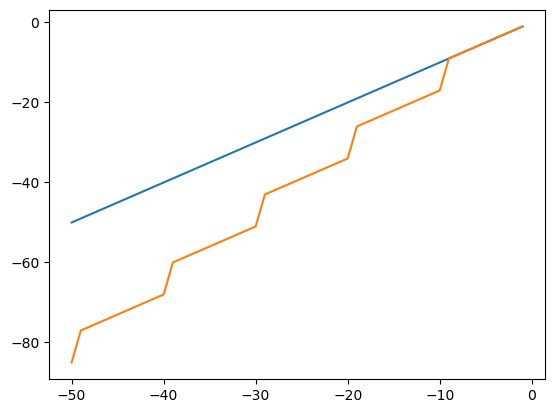

In [61]:
minus_50_to_0 = list(range(-50, 0, 1))

step = 10
minus = -7

for j in range(int(len(minus_50_to_0) / step)):
    for i in range(50):
        if minus_50_to_0[i] <= -50 + step * j:
            minus_50_to_0[i] += minus

minus_50_to_0
x = np.arange(-50, 0, 1)
plt.plot(x, x)
plt.plot(x, minus_50_to_0)
plt.show()